In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load and read the dataset

In [2]:
df=pd.read_csv("C:/Users/adity/OneDrive/Desktop/LEARNER SMASHER/future sales.csv")

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Show first 5 and last 5 rows in the dataset

In [6]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


# Find the shape of the dataset

In [8]:
df.shape

(200, 4)

In [9]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
len(df.columns)

4

# All information and statistics about the dataset 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Checking null and duplicate value

In [13]:
df.isnull()

,TV,Radio,Newspaper,Sales
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
195,False,False,False,False
196,False,False,False,False
197,False,False,False,False
198,False,False,False,False


In [14]:
df.isnull().sum(axis=0)#Column wise null values

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
df.isnull().sum(axis=1)#Row wise null values

0      0
1      0
2      0
3      0
4      0
      ..
195    0
196    0
197    0
198    0
199    0
Length: 200, dtype: int64

<AxesSubplot:>

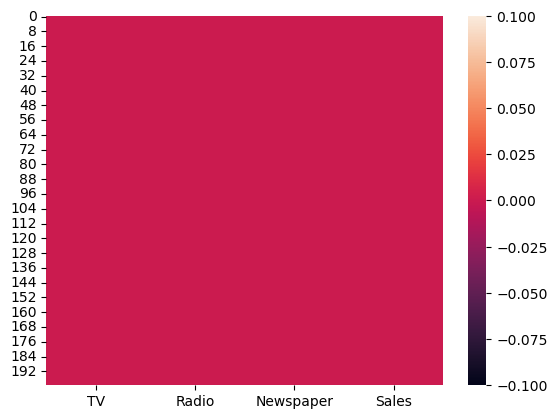

In [25]:
sns.heatmap(df.isnull())

In [21]:
dup=df.duplicated().any()
print("is any duplicated values are there",dup)

is any duplicated values are there False


# Total sales of each category

In [22]:
df.sum(axis=0)

TV           29408.5
Radio         4652.8
Newspaper     6110.8
Sales         3026.1
dtype: float64

# Find the max and min and average sales of each category

In [23]:
df.max(axis=0)

TV           296.4
Radio         49.6
Newspaper    114.0
Sales         27.0
dtype: float64

In [24]:
df.min(axis=0)

TV           0.7
Radio        0.0
Newspaper    0.3
Sales        1.6
dtype: float64

In [26]:
df.mean(axis=0)

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64

# Top 5 highest sales in TV category

In [28]:
df["TV"].value_counts().head()

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
Name: TV, dtype: int64

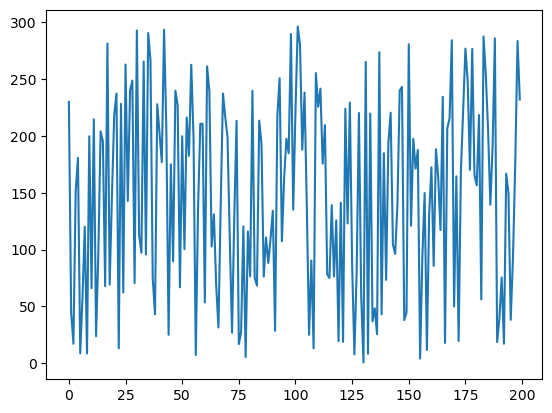

In [30]:
plt.plot(df['TV'])

# Scatter plot relationship between the amount spent on advertising an radio and amount sold  

In [34]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=df,x='Sales',y="Radio",size="TV",trendline="ols")
figure.show()

# For "TV"


In [35]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=df,x='Sales',y="TV",size="TV",trendline="ols")
figure.show()

# For "Newspaper"

In [44]:
import plotly.express as px
import plotly.graph_objects as go
figure=px.scatter(data_frame=df,x='Sales',y="Newspaper",size="Newspaper",trendline="ols")
figure.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Find the corrrelation value

In [46]:
correlation = df.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


# Machine learning model

In [48]:
x = np.array(df.drop(["Sales"], 1))
y = np.array(df["Sales"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

C:\Users\adity\AppData\Local\Temp\ipykernel_12700\386249404.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [49]:
model = LinearRegression()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9059011844150826


In [50]:
#features = [[TV, Radio, Newspaper]]
features = np.array([[230.1, 37.8, 69.2]])
print(model.predict(features))

[21.37254028]


   # Find the minimum Sales and Maximum Sales?

In [51]:
df["Sales"].max()

27.0

In [52]:
df[df["Sales"]==27.0]

,TV,Radio,Newspaper,Sales
175,276.9,48.9,41.8,27.0


In [53]:
df["Sales"].min()


1.6

In [54]:
df[df["Sales"]==1.6]

,TV,Radio,Newspaper,Sales
130,0.7,39.6,8.7,1.6


# Write all the records when TV sales is more than 150 

In [58]:
df[df["TV"]>150]

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
9,199.8,2.6,21.2,15.6
11,214.7,24.0,4.0,17.4
...,...,...,...,...
188,286.0,13.9,3.7,20.9
193,166.8,42.0,3.6,19.6
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [59]:
len(df[df["TV"]>150])

99